# K Means Clustering

Unsupervised Data - No outcome

Classification tool, not a prediction tool

Just Grouping of the data to find how the data relates to each other

The outcome is only representing how the data relates to each other and what group new data might belong to

This will not correlate to any kind of pre-determined outcome

###### Pros

Simple to work with and implement

Scales to large data sets

Easily adapts to new examples.

Clusters can be of different shapes and sizes

###### Cons

Have to choose the `K-value` manually

Has a hard time with clustering data with varying densities, helps to scale the data in advance

Outliers can move the center of a cluster

Scaling with number of dimensions.

### Getting the Data

Classification Test Set (SKLearn Iris Dataset)

`from sklearn.datasets import load_iris`

Classification Test Set (Titanic Data Set)

https://www.kaggle.com/datasets/brendan45774/test-file

### How it works

Choose a random number of K (clusters, ex4)

Randomly assign each point to a cluster (1 through 4) for the entire dataset (ex 100 points means 25 points per cluster)

For each cluster of points compute the center by taking the average distance from each other in the cluster

Assign each data point to the cluster for which the center is the closest

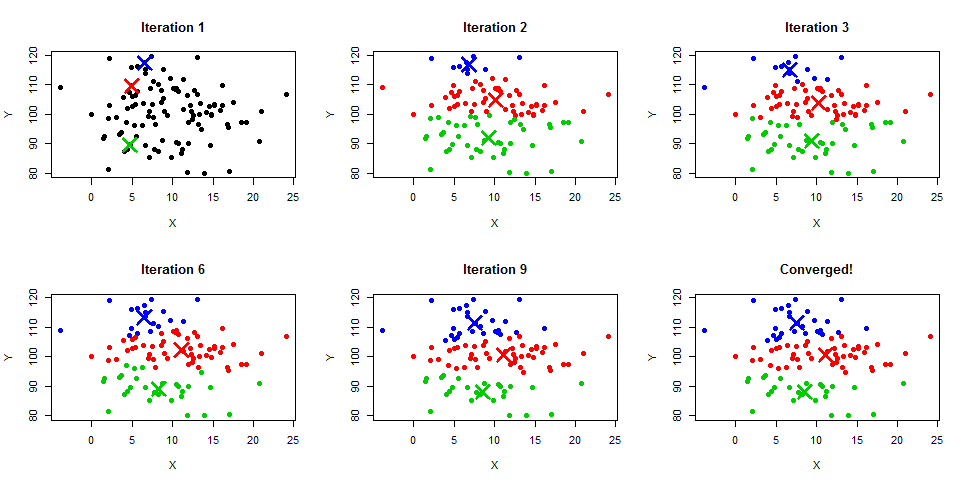

###### Train Test and Split or Not?

Train Test Split doesn't really make sense here because we don't have a target so we really don't have a y value at all,  

However the `model` does output `labels_` which can be used as predictions

`
df = pd.DataFrame(data)
model = KMeans(n_clusters=4)
model.fit(df)
y_kmeans = model.labels_
`

If we have a dataset that has an output and we want to evaluate against that output dataset, we would compare values between the output and the `model.labels_`

### How do I determine the Best K value?

No easy answer for the `K value`

###### Elbow Method

Inertia or SSE Sum of Squared Errors

Inertia Values are used to determine how well a centroid fits with the clusters of data

Distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster

It's called the elbow method because if done correctly the graph looks like an elbow

The point of the elbow is the ideal value for the number of clusters

`
inertias = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    y_kmeans = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
px.line(x=range(1,20), y=inertias)
`



`sns.scatterplot(x=data[0][:,0], y=data[0][:,1], c=model.labels_).set(title='K Means Model')
`

`
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], c=data[1]).set(title='Original')
`



### Evaluation

Difficult to perform however we can see visualizations to see how the KMeans clustering thought to organize the data

Labels = Predictions

`model.labels_`

Fit Score for the model

`
score = silhouette_score(df, model.labels_)
score
`

Centroids

`model.cluster_centers_`

Visualization - The following is comparing column by columns of the X data array and coloring them according to the `kmeans.labels_` predictions

Below that is the placement of the centers (centroids) of each grouping

On the Left is the original scatter plot

On the Right is what KMeans calculated the groupings to be

`
fig, ax = plt.subplots(3,2, figsize=(8,12))
ax[0,0].scatter(X[:,0], X[:,1])
ax[0,1].scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax[0,1].scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red')
ax[1,0].scatter(X[:,1], X[:,2])
ax[1,1].scatter(X[:,1], X[:,2], c=kmeans.labels_)
ax[1,1].scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='red')
ax[2,0].scatter(X[:,2], X[:,3])
ax[2,1].scatter(X[:,2], X[:,3], c=kmeans.labels_)
ax[2,1].scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],color='red')
fig.tight_layout()
`

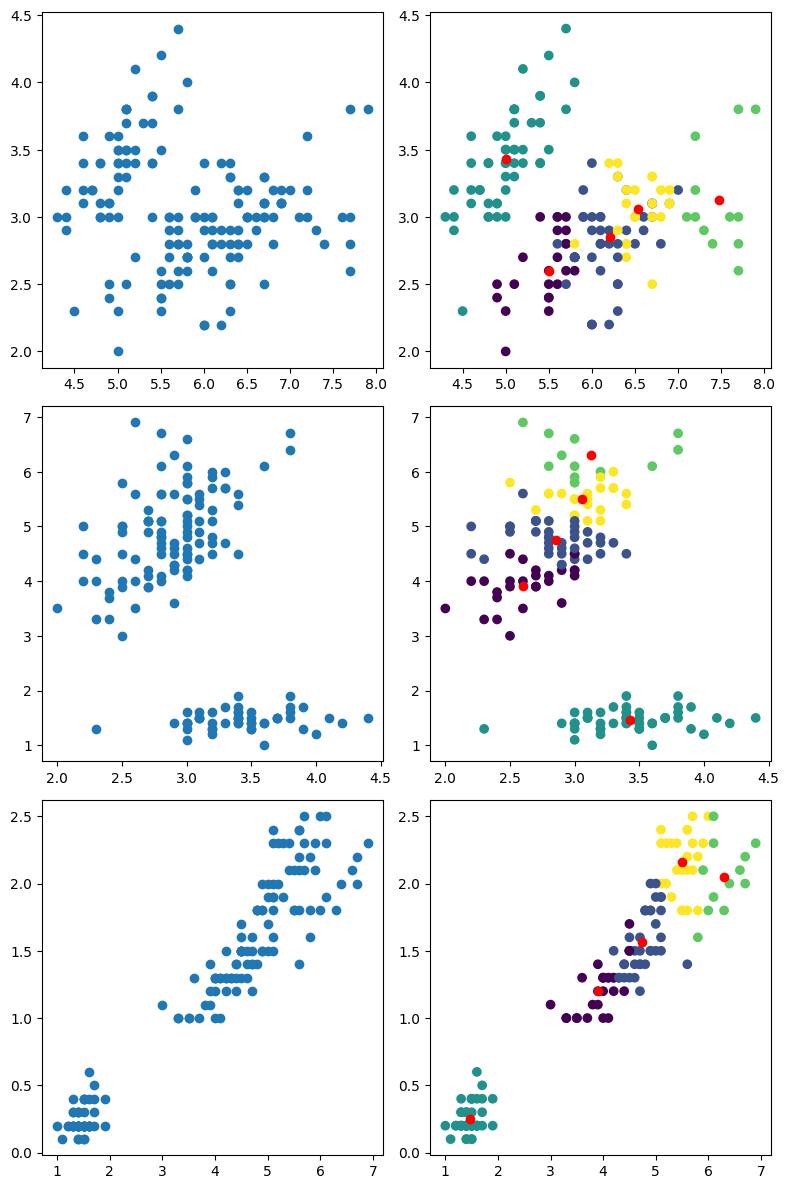

In [60]:

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from sklearn.datasets import load_iris

### KMeans Clustering with the Iris Dataset

In [61]:
data = load_iris()

In [62]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [63]:
# Not necesary to create a df for KMeans but we will for data exploration

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [64]:
df['target'] = data.target

In [65]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [66]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [67]:
df['target_names'] = df['target'].map({
    0: data.target_names[0],
    1: data.target_names[1],
    2: data.target_names[2],
})

In [69]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa

In [70]:
df['target_names'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target_names, dtype: int64

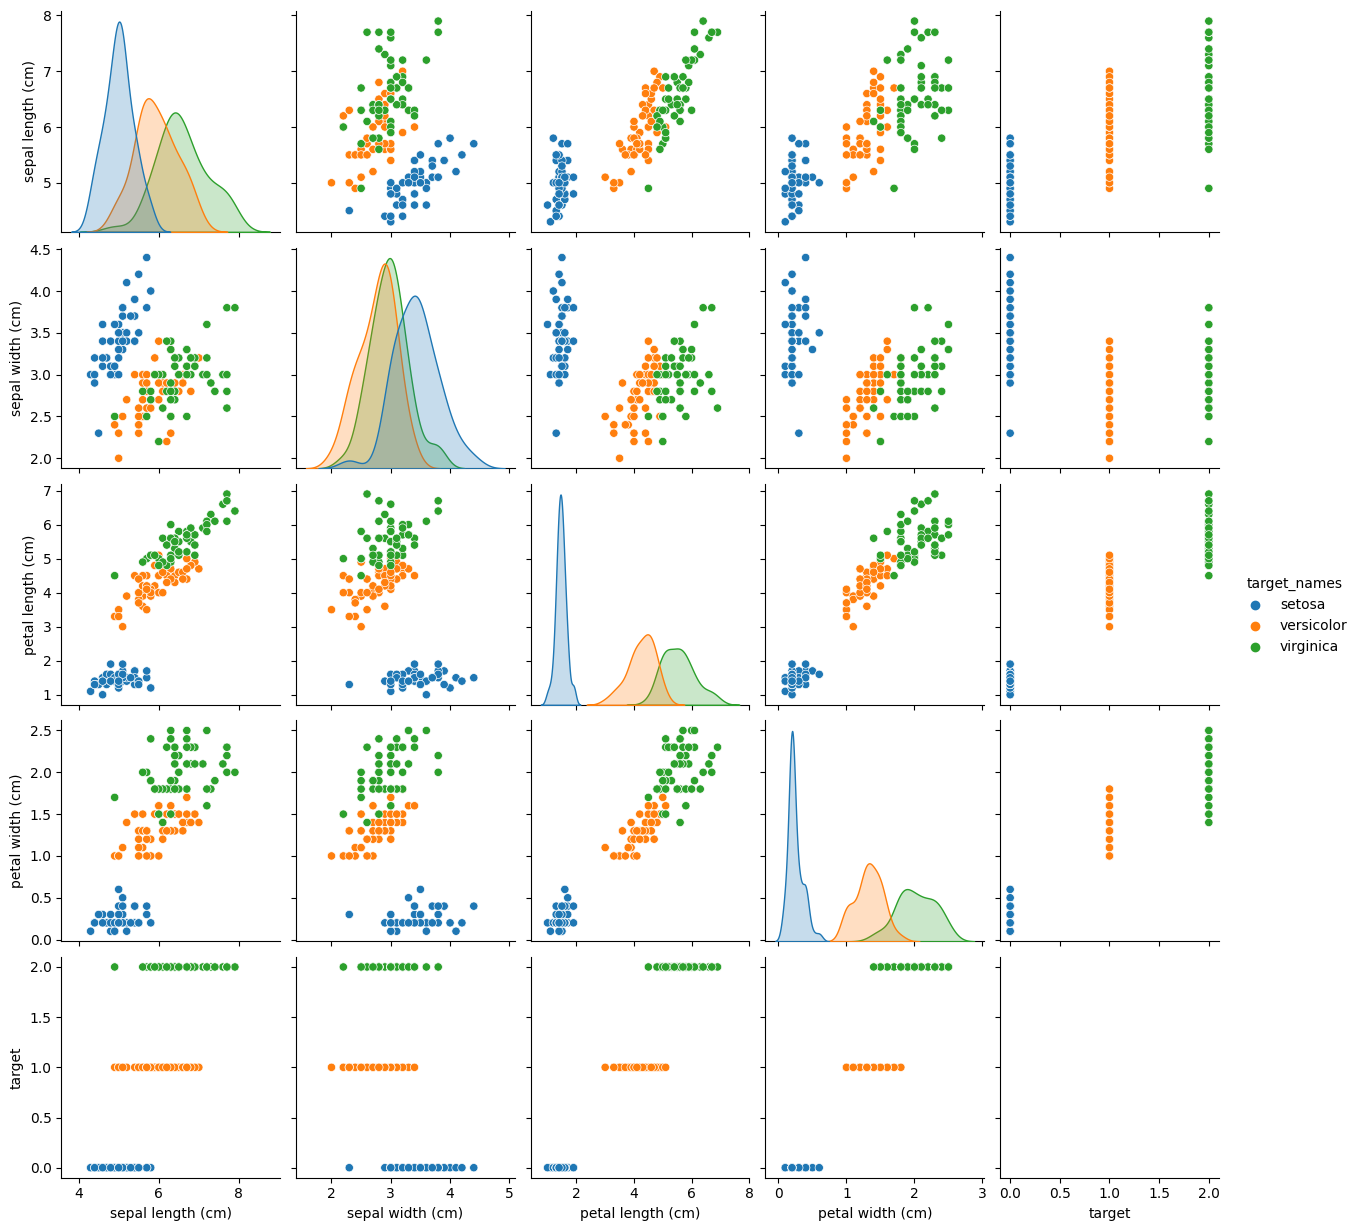

In [71]:
sns.pairplot(df, hue='target_names')

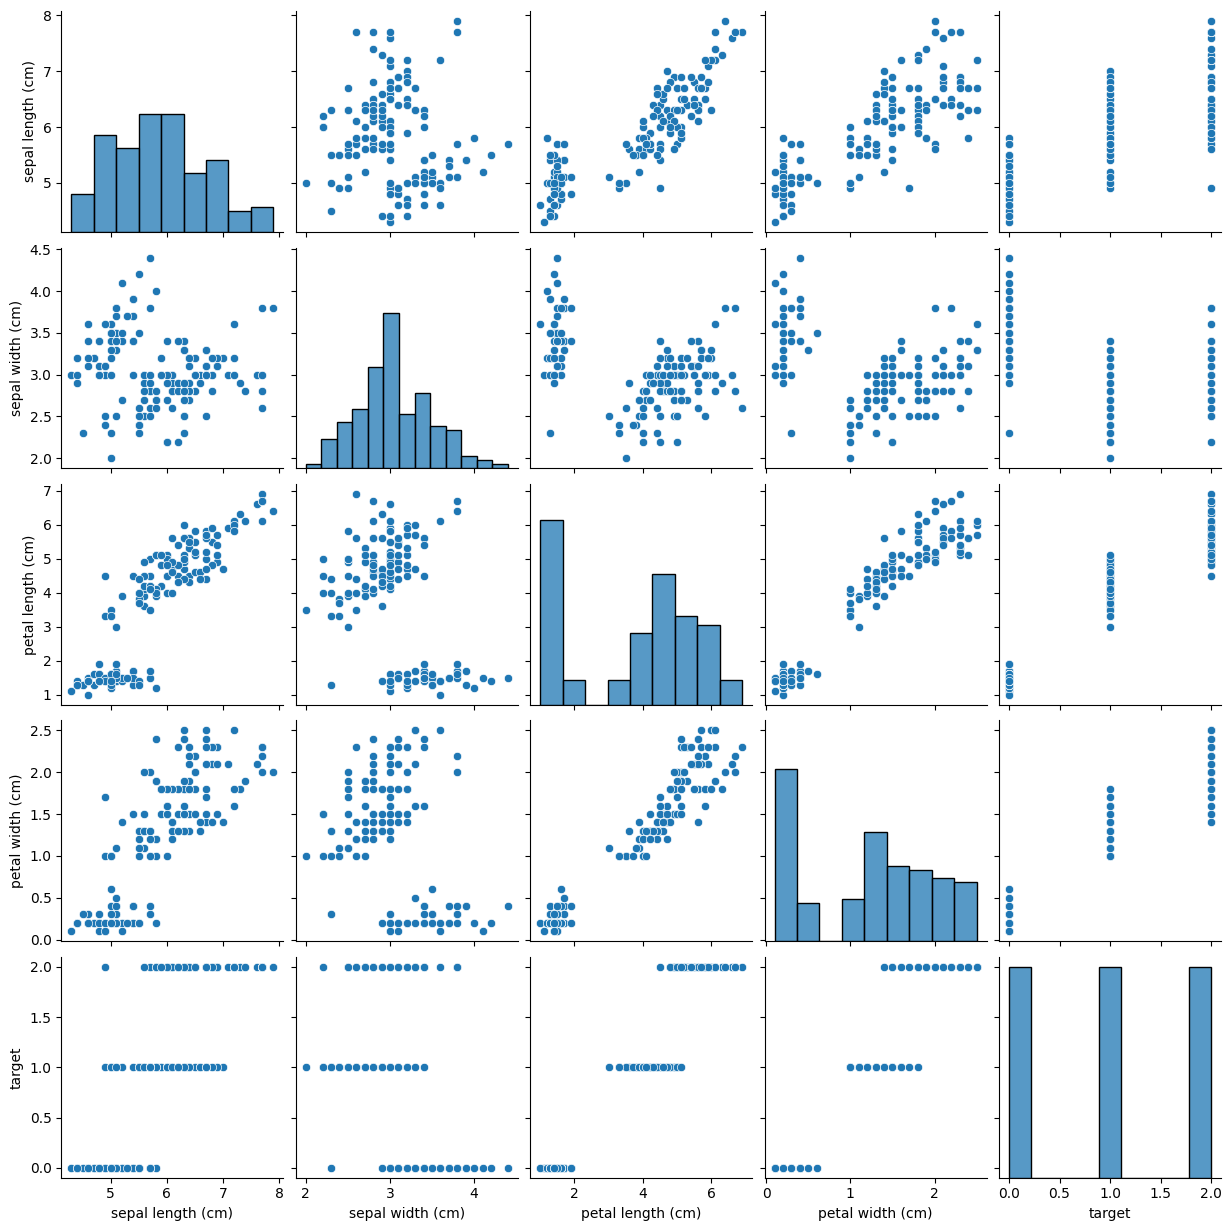

In [72]:
sns.pairplot(df)

In [76]:
# Train test split, but wait, There is no train test split
# Because we have no outcome
# So what do we do...?


X = df[df.columns[:-2]]




In [77]:
# Fit the model (data will be unscaled)

model = KMeans()
model.fit(X)



KMeans()

In [78]:
# Predictions

model.labels_

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 0, 7, 7, 7, 2, 7, 6, 7, 2, 7, 2, 2, 6, 2, 7, 2, 7,
       6, 6, 1, 2, 1, 6, 1, 7, 7, 7, 7, 7, 6, 2, 2, 2, 6, 1, 6, 7, 7, 7,
       6, 2, 6, 7, 6, 2, 6, 6, 6, 7, 2, 6, 3, 1, 3, 3, 3, 5, 6, 5, 3, 5,
       3, 1, 3, 1, 1, 3, 3, 5, 5, 1, 3, 1, 5, 1, 3, 5, 1, 1, 3, 3, 5, 5,
       3, 1, 1, 5, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int32)

In [79]:
# The centers of each cluster

model.cluster_centers_

array([[4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [6.03684211, 2.70526316, 5.        , 1.77894737],
       [5.39230769, 2.43846154, 3.65384615, 1.12307692],
       [6.61666667, 3.07916667, 5.5625    , 2.1375    ],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [7.54      , 3.15      , 6.39      , 2.09      ],
       [5.675     , 2.8125    , 4.24375   , 1.33125   ],
       [6.46666667, 2.98333333, 4.6       , 1.42777778]])

In [81]:
X

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

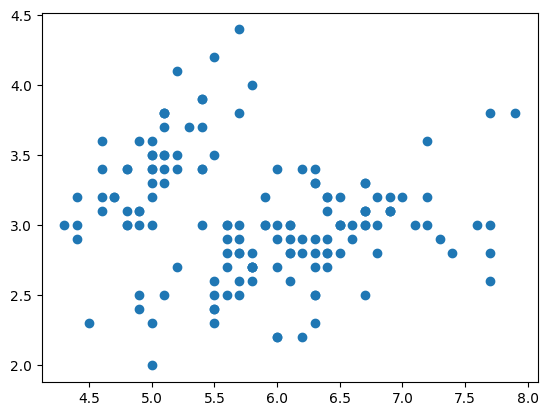

In [82]:
# Using matplot lib

# Plot the original
fig, ax = plt.subplots(1,1)
ax.scatter(x=X.iloc[:,0], y=X.iloc[:,1], )

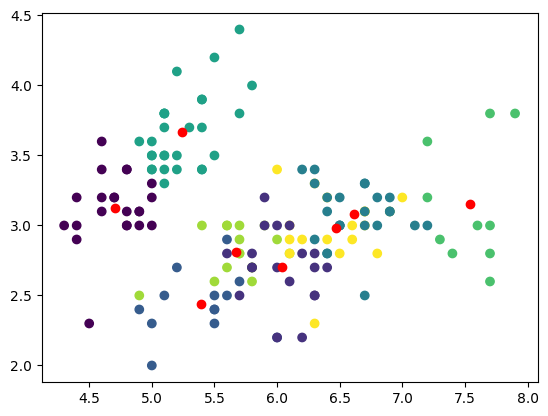

In [84]:
# Plot the original with the predicted clusters

fig, ax = plt.subplots(1,1)
ax.scatter(x=X.iloc[:,0], y=X.iloc[:,1], c=model.labels_)

# Plot the centers of each cluster
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], color='red')

In [85]:
# The above doesn't look great based on the default KMeans algorithm
# Let's tune the alorithm by finding the best K value

inertias = []

for i in range(1,20):
    model = KMeans(n_clusters= i )
    model.fit(X)
    inertias.append(model.inertia_)

inertias



[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.185072738664847,
 28.20603751803752,
 25.972596377306907,
 24.934492081447964,
 22.87595133280892,
 21.740204938680176,
 20.293152783920586,
 19.733671545173095,
 18.26867335829693,
 17.316118383078912,
 16.487311624649863,
 15.681016290726818]

In [86]:
px.line(x=range(1,20), y=inertias)

In [87]:
model = KMeans(n_clusters=3)
model.fit(X)


KMeans(n_clusters=3)

In [88]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [89]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

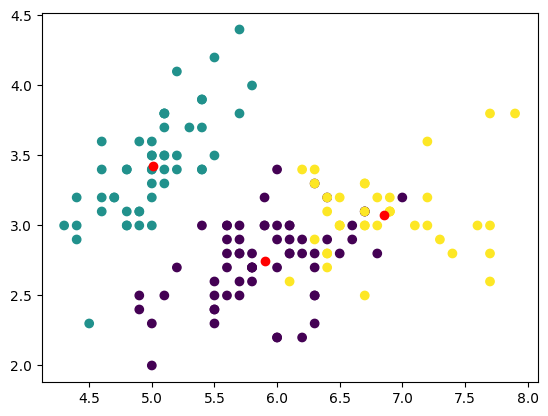

In [90]:
fig, ax = plt.subplots(1,1)
ax.scatter(x=X.iloc[:,0], y=X.iloc[:,1], c=model.labels_)

# Plot the centers of each cluster
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], color='red')

In [91]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [92]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [125]:
# If we have the same labels and the targets categories
# In this case 3 clusters match the 3 outcomes then we can compare
# NOT RECOMMENDED but maybe it's of use

# Also the results will be inconsistently consistent

model = KMeans(n_clusters=3)
model.fit(X)

print(confusion_matrix(data.target, model.labels_))
print(classification_report(data.target, model.labels_))
print(model.cluster_centers_)

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [126]:
# Scaled Data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [127]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [142]:
model = KMeans(n_clusters=3)
model.fit(X_scaled)

print(confusion_matrix(data.target, model.labels_))
print(classification_report(data.target, model.labels_))
print(model.cluster_centers_)

[[ 0 50  0]
 [11  0 39]
 [36  0 14]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.26      0.28      0.27        50

    accuracy                           0.09       150
   macro avg       0.09      0.09      0.09       150
weighted avg       0.09      0.09      0.09       150

[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]


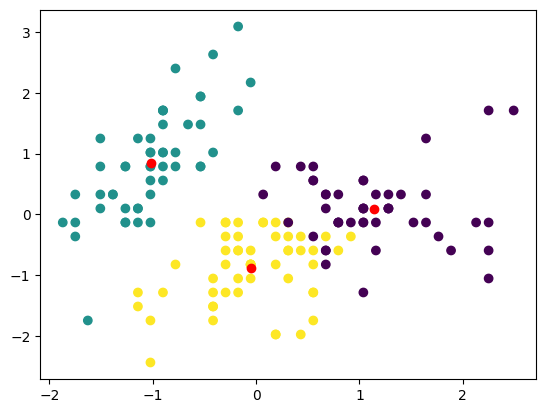

In [143]:
fig, ax = plt.subplots(1,1)
ax.scatter(x=X_scaled[:,0], y=X_scaled[:,1], c=model.labels_)

# Plot the centers of each cluster
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], color='red')

### KMeans Clustering with the Titanic Dataset

In [144]:
# This example the outcome labels may not match the Survived Column ( 0 or 1 )

In [145]:
df = pd.read_csv('Titanic.csv')

In [146]:
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [147]:
def fill_in_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if np.isnan(age):
        if pclass == 1:
            return 41
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age
df['Age'] = df[['Age', 'Pclass']].apply(fill_in_age, axis=1)

# Embarked and Pclass split

emb = pd.get_dummies(df['Embarked'], drop_first=True)
pclass = pd.get_dummies(df['Pclass'], drop_first=True)
pclass = pclass.rename({2:'P2', 3:'P3'}, axis=1)

df = pd.concat([df, emb, pclass], axis=1)

# Drop the unnecessary columns
df = df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Age       417 non-null    float64
 2   SibSp     417 non-null    int64  
 3   Parch     417 non-null    int64  
 4   Fare      417 non-null    float64
 5   Q         417 non-null    uint8  
 6   S         417 non-null    uint8  
 7   P2        417 non-null    uint8  
 8   P3        417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 21.2 KB


In [148]:
X = df[df.columns[1:]]

In [149]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
X_scaled

array([[ 0.40118675, -0.50021819, -0.40080432, ..., -1.34817194,
        -0.53575838,  0.96003072],
       [ 1.37179984,  0.61524163, -0.40080432, ...,  0.74174515,
        -0.53575838,  0.96003072],
       [ 2.53653555, -0.50021819, -0.40080432, ..., -1.34817194,
         1.86651305, -1.04163333],
       ...,
       [ 0.71178293, -0.50021819, -0.40080432, ...,  0.74174515,
        -0.53575838,  0.96003072],
       [-0.41412825, -0.50021819, -0.40080432, ...,  0.74174515,
        -0.53575838,  0.96003072],
       [-0.41412825,  0.61524163,  0.61831399, ..., -1.34817194,
        -0.53575838,  0.96003072]])

In [153]:
# Find the best K value

inertias = []

for i in range(1,50):
    model = KMeans(n_clusters=i)
    model.fit(X_scaled)
    inertias.append(model.inertia_)
inertias

[3336.0,
 2600.2213621880965,
 2133.1221870042214,
 1688.2303287982509,
 1401.9869201654883,
 1214.15865516833,
 1066.931690510521,
 944.8079528281417,
 848.4448972646926,
 786.0883778086547,
 739.4515536927388,
 702.1335705104877,
 653.8804994573528,
 630.3689029455844,
 607.4587881464141,
 558.7838270922327,
 542.6412243242155,
 517.4998773468691,
 496.27102724823624,
 462.23544742396064,
 438.41994686294265,
 412.0482285539026,
 393.44004220742,
 381.62755635467664,
 363.46944541183035,
 343.3711325086944,
 328.8597066406236,
 309.13387395328846,
 297.99881549061183,
 279.8917433738589,
 276.90599558412487,
 269.0643669756208,
 250.37504040536393,
 245.5883812185802,
 235.9783524412034,
 232.80188753751364,
 218.0948179446296,
 217.8109946737181,
 205.17205508807962,
 199.57113301022338,
 199.0271953037897,
 191.71881810214018,
 189.48407616115176,
 177.8985014945551,
 172.04770992558016,
 170.65061080312813,
 163.69384601330535,
 158.2259370845621,
 154.0272608931407]

In [155]:
px.line(x=range(1,50), y=inertias)

In [156]:
model = KMeans(n_clusters=9)
model.fit(X_scaled)


KMeans(n_clusters=9)

In [157]:
model.labels_

array([2, 1, 2, 1, 1, 1, 2, 3, 8, 1, 1, 5, 5, 3, 5, 3, 2, 8, 1, 8, 4, 1,
       5, 4, 0, 1, 4, 8, 5, 8, 3, 3, 1, 1, 4, 8, 1, 1, 1, 1, 8, 5, 1, 3,
       5, 1, 4, 2, 4, 1, 5, 3, 3, 0, 3, 6, 1, 1, 1, 0, 1, 3, 1, 2, 0, 3,
       2, 5, 4, 0, 2, 1, 1, 4, 0, 0, 1, 5, 3, 2, 8, 0, 5, 1, 2, 8, 2, 1,
       2, 3, 1, 1, 5, 1, 4, 1, 5, 1, 1, 1, 4, 3, 2, 1, 8, 1, 2, 2, 1, 3,
       3, 2, 4, 2, 0, 8, 8, 1, 4, 3, 3, 2, 4, 1, 2, 1, 1, 2, 3, 1, 1, 4,
       7, 8, 1, 1, 8, 3, 1, 7, 6, 5, 0, 3, 5, 6, 5, 1, 5, 3, 4, 8, 1, 6,
       1, 0, 1, 5, 1, 2, 8, 3, 1, 3, 1, 4, 1, 4, 1, 1, 8, 1, 8, 7, 3, 3,
       4, 3, 4, 3, 4, 5, 2, 0, 3, 3, 1, 6, 3, 3, 5, 1, 2, 3, 1, 4, 1, 3,
       1, 2, 1, 0, 3, 3, 4, 2, 3, 4, 1, 1, 1, 3, 3, 6, 5, 2, 0, 0, 1, 3,
       1, 3, 1, 4, 8, 1, 2, 1, 3, 3, 5, 1, 2, 4, 1, 4, 8, 3, 4, 4, 3, 4,
       1, 1, 5, 3, 3, 3, 8, 3, 1, 4, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       1, 5, 1, 1, 1, 4, 2, 4, 2, 8, 3, 3, 3, 3, 3, 1, 1, 2, 8, 1, 1, 1,
       5, 8, 1, 5, 2, 8, 5, 1, 1, 3, 8, 5, 1, 1, 3,

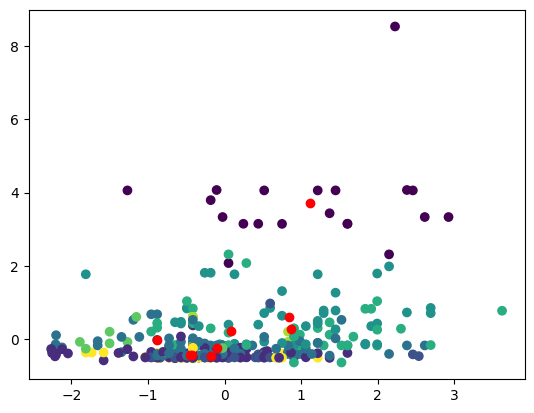

In [160]:
fig, ax = plt.subplots(1,1)
ax.scatter(x=X_scaled[:,0], y=X_scaled[:,3], c=model.labels_)
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,3], color='red')